In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### step 1: Load Data

In [2]:
df = pd.read_csv('final_project_dataset_complete.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (9000, 11)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


### step 2: Basic Data Information

In [3]:
print("Dataset Info:")
print("-" * 50)
print(df.info())

print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())

print("\nBasic Statistics:")
print("-" * 50)
print(df.describe())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB
None

Missing Values:
--------------------------------------------------
feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1    

### step 3: Detailed Missng Data Analysis

In [4]:
print("\nTotal missing values in each column:")
print("-" * 50)
missing_values = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentages], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print(missing_data)


Total missing values in each column:
--------------------------------------------------
            Missing Values  Percentage
feature_1                0    0.000000
feature_2                0    0.000000
feature_3              400    4.444444
feature_4                0    0.000000
feature_5                0    0.000000
feature_6              500    5.555556
feature_7                0    0.000000
feature_8                0    0.000000
category_1               0    0.000000
category_2               0    0.000000
target                   0    0.000000


### step 4: Visualize Missing Data Pattern

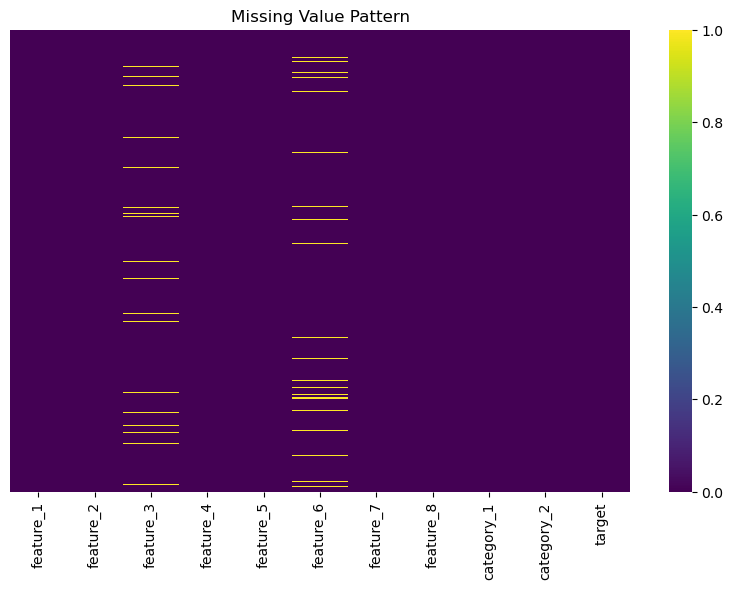

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Value Pattern')
plt.show()

### step 5: Analyze Missing Data Relationships

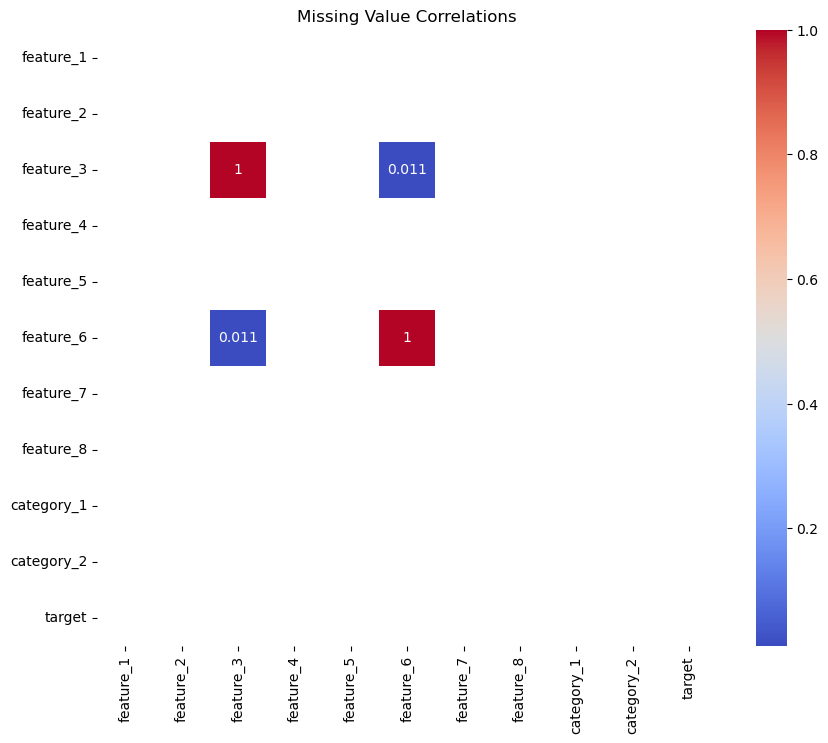

In [6]:
null_correlations = df.isnull().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(null_correlations, annot=True, cmap='coolwarm')
plt.title('Missing Value Correlations')
plt.show()

### step 6: Handle Missing Values for Numerical columns

In [7]:
numerical_columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
                    'feature_5', 'feature_6', 'feature_7', 'feature_8']

df_clean = df.copy()

for column in numerical_columns:
    print(f"\nColumn: {column}")
    print("Before imputation:")
    print(df_clean[column].describe())
    
    missing = df_clean[column].isnull().sum()
    missing_percent = (missing / len(df_clean)) * 100
    
    if missing > 0:
        print(f"\nMissing values: {missing} ({missing_percent:.2f}%)")

        skewness = df_clean[column].skew()
        print(f"Skewness: {skewness:.2f}")

        if missing_percent > 40:
            print("Warning: High percentage of missing values. Consider dropping this column.")
        
        if abs(skewness) > 1:
            impute_value = df_clean[column].median()
            method = "median"
        else:
            impute_value = df_clean[column].mean()
            method = "mean"

        df_clean[column].fillna(impute_value, inplace=True)
        print(f"\nImputed {missing} values with {method}: {impute_value:.2f}")

        print("\nAfter imputation:")
        print(df_clean[column].describe())


Column: feature_1
Before imputation:
count    9000.000000
mean        0.000427
std         1.241318
min       -18.665400
25%        -0.680062
50%        -0.003938
75%         0.680513
max        21.934496
Name: feature_1, dtype: float64

Column: feature_2
Before imputation:
count    9000.000000
mean        0.003349
std         2.508324
min       -37.852816
25%        -1.382610
50%        -0.016698
75%         1.380228
max        47.603454
Name: feature_2, dtype: float64

Column: feature_3
Before imputation:
count    8600.000000
mean        0.003235
std         1.542901
min        -6.676680
25%        -1.022085
50%         0.005196
75%         1.038571
max         6.203055
Name: feature_3, dtype: float64

Missing values: 400 (4.44%)
Skewness: -0.01

Imputed 400 values with mean: 0.00

After imputation:
count    9000.000000
mean        0.003235
std         1.508221
min        -6.676680
25%        -0.973333
50%         0.003235
75%         0.972588
max         6.203055
Name: feature_3, d

### step 7: Visualize distribution before and after

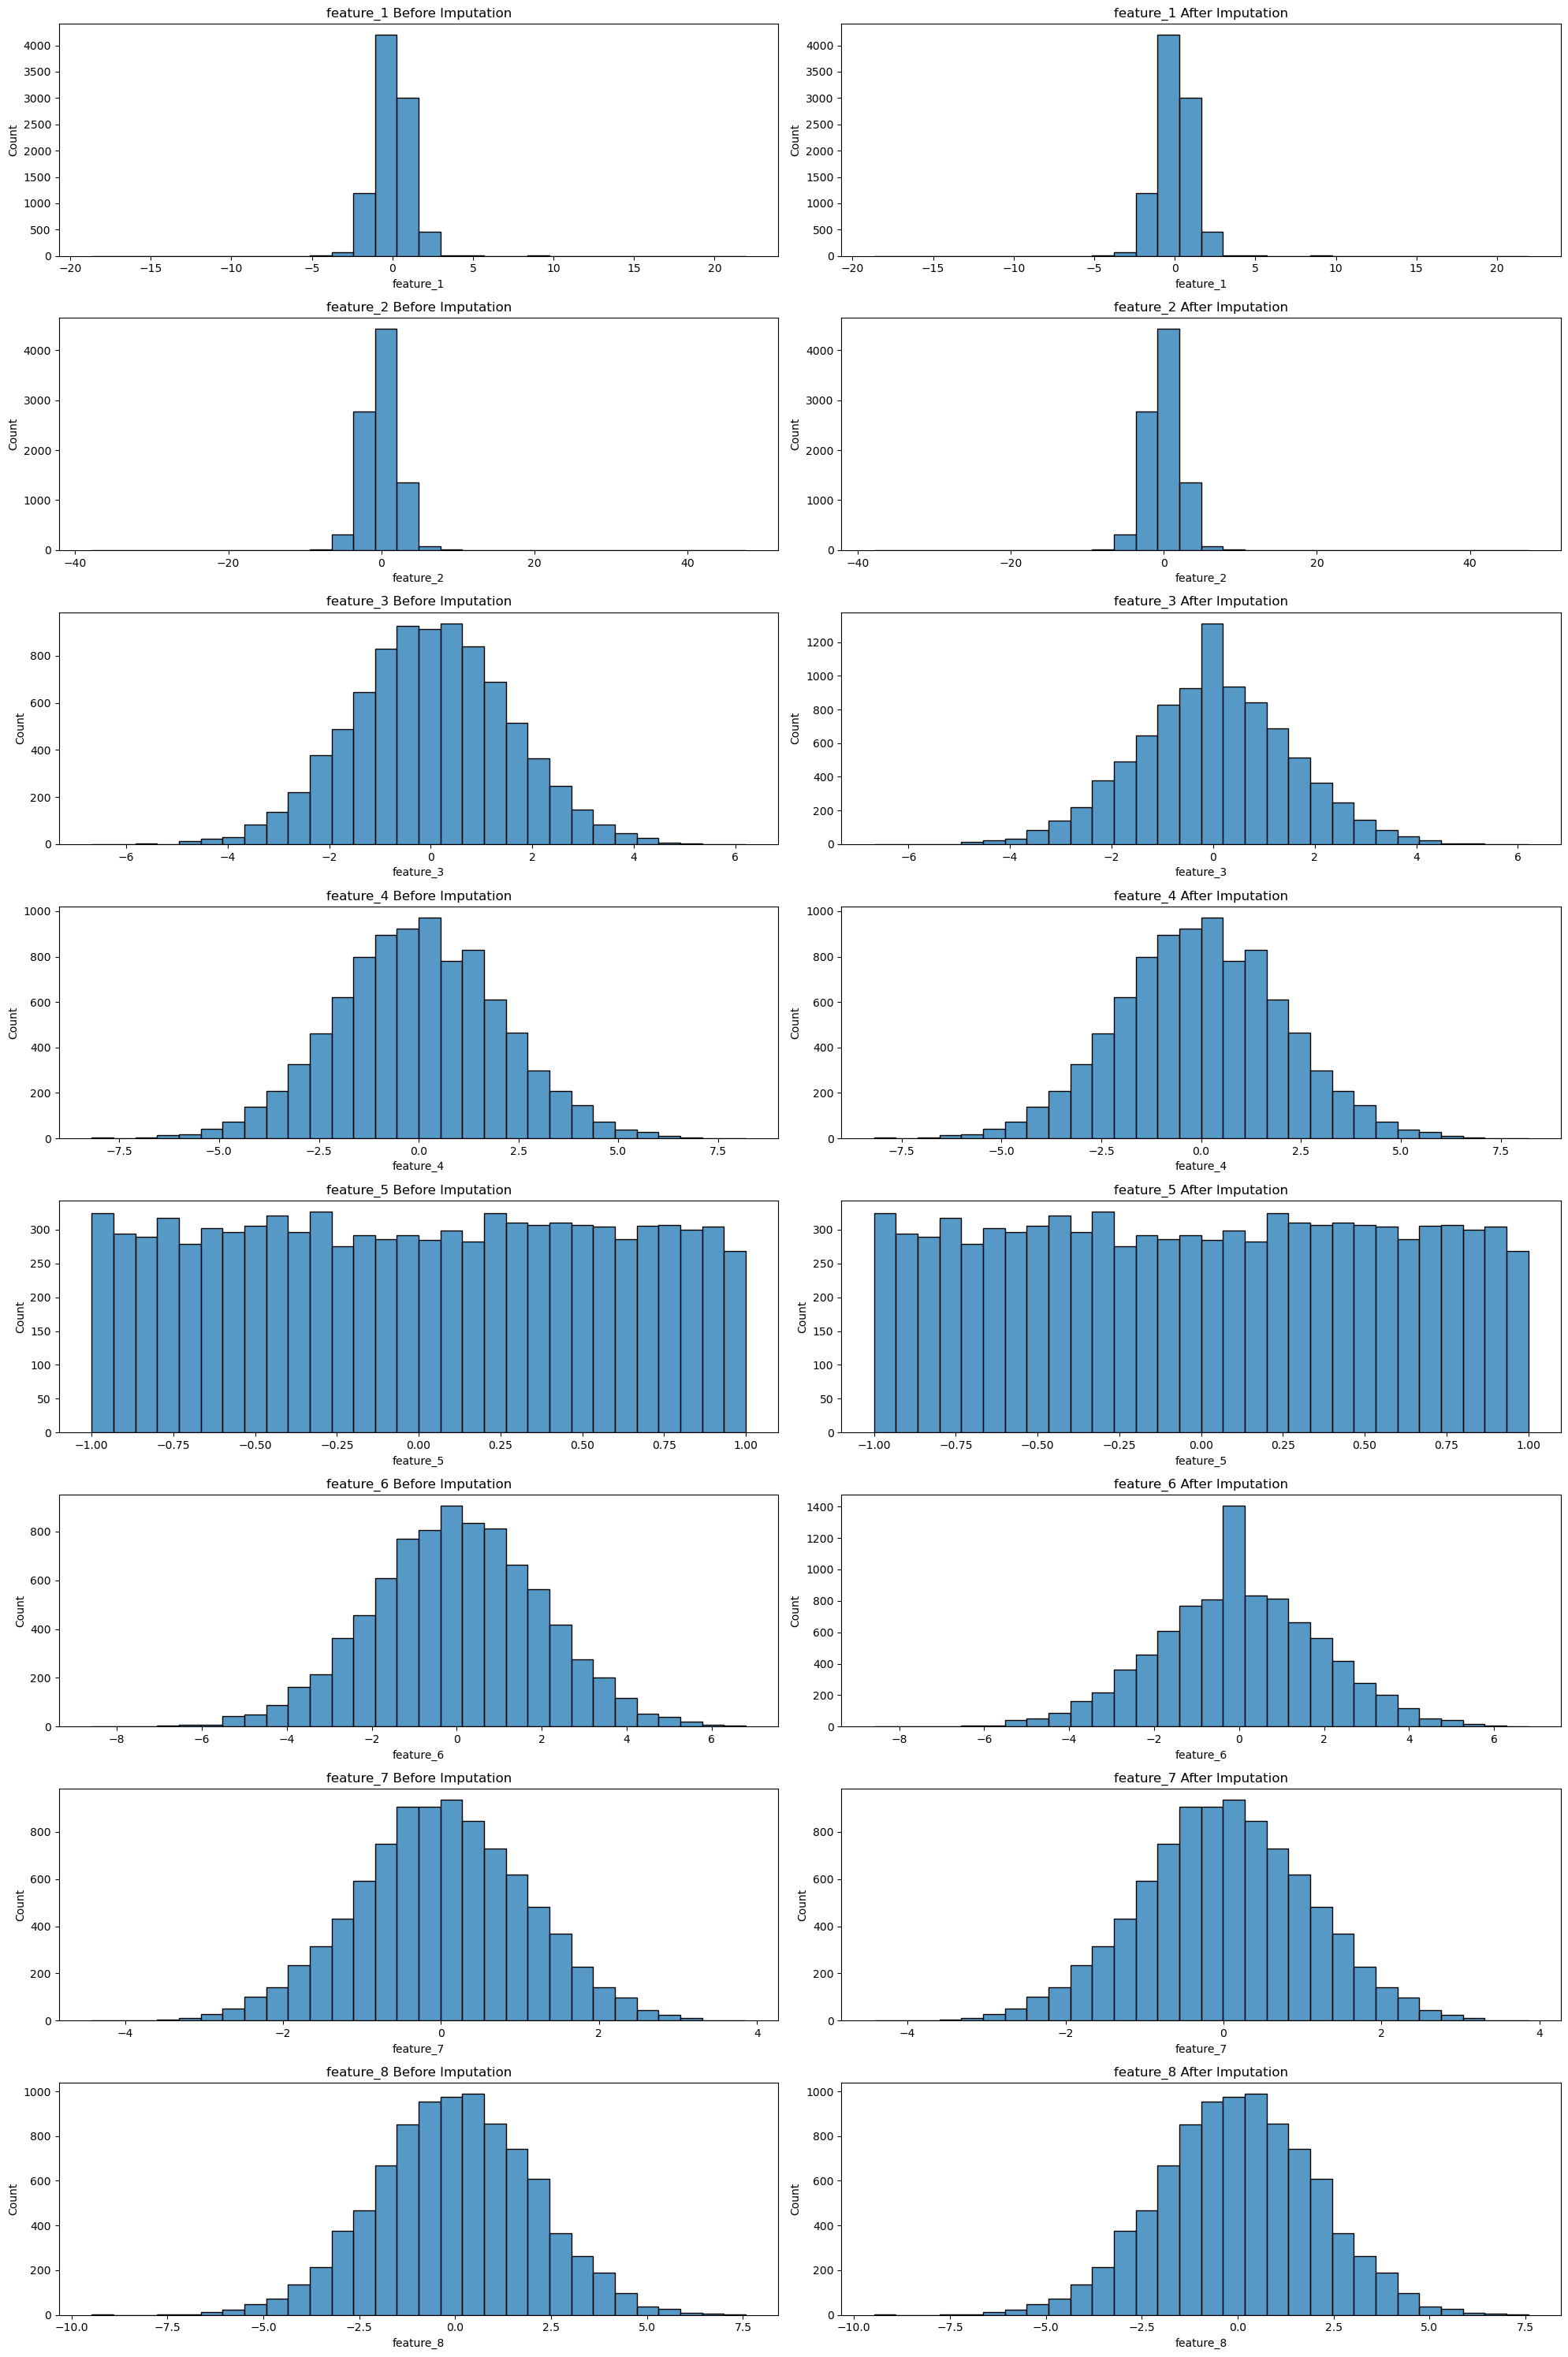

In [8]:
plt.figure(figsize=(20, 30)) 

for i, column in enumerate(numerical_columns):
    plt.subplot(8, 2, 2*i + 1)
    sns.histplot(df[column].dropna(), bins=30)
    plt.title(f'{column} Before Imputation')
    
    plt.subplot(8, 2, 2*i + 2)
    sns.histplot(df_clean[column], bins=30)
    plt.title(f'{column} After Imputation')

plt.tight_layout()
plt.show()

### step 8: Handle Missing Values for Categorical Columns

In [9]:
# Enhanced categorical data analysis and handling
categorical_columns = ['category_1', 'category_2']

for column in categorical_columns:
    print(f"\n=== Analysis for {column} ===")

    print("Original data:")
    print("-" * 20)
    print("Value counts:")
    print(df_clean[column].value_counts(dropna=False))  # Added dropna=False to show NaN
    print("\nUnique values:", df_clean[column].nunique())
    
    # Check missing values
    missing = df_clean[column].isnull().sum()
    missing_percent = (missing / len(df_clean)) * 100
    print(f"\nMissing values: {missing} ({missing_percent:.2f}%)")
    
    if missing > 0:
        value_dist = df_clean[column].value_counts(normalize=True) * 100
        print("\nOriginal category distribution (%):")
        print(value_dist)

        if missing_percent > 40:
            print("\nApplying 'Unknown' category")
            df_clean[column].fillna('Unknown', inplace=True)
        elif value_dist.iloc[0] > 90:
            print("\nApplying mode imputation (warning: imbalanced categories)")
            mode_value = df_clean[column].mode()[0]
            df_clean[column].fillna(mode_value, inplace=True)
        else:
            print("\nApplying standard mode imputation")
            mode_value = df_clean[column].mode()[0]
            df_clean[column].fillna(mode_value, inplace=True)
    else:
        print("No missing values found - no imputation needed")

    print("\nFinal distribution (%):")
    print(df_clean[column].value_counts(normalize=True) * 100)

print("\n=== Final Missing Values Check ===")
print(df_clean[categorical_columns].isnull().sum())


=== Analysis for category_1 ===
Original data:
--------------------
Value counts:
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: category_1, dtype: int64

Unique values: 4

Missing values: 0 (0.00%)
No missing values found - no imputation needed

Final distribution (%):
Low              31.133333
High             30.700000
Above Average    19.188889
Below Average    18.977778
Name: category_1, dtype: float64

=== Analysis for category_2 ===
Original data:
--------------------
Value counts:
Region B    3618
Region A    3551
Region C    1831
Name: category_2, dtype: int64

Unique values: 3

Missing values: 0 (0.00%)
No missing values found - no imputation needed

Final distribution (%):
Region B    40.200000
Region A    39.455556
Region C    20.344444
Name: category_2, dtype: float64

=== Final Missing Values Check ===
category_1    0
category_2    0
dtype: int64


### step 9: Visualize before/after distribution

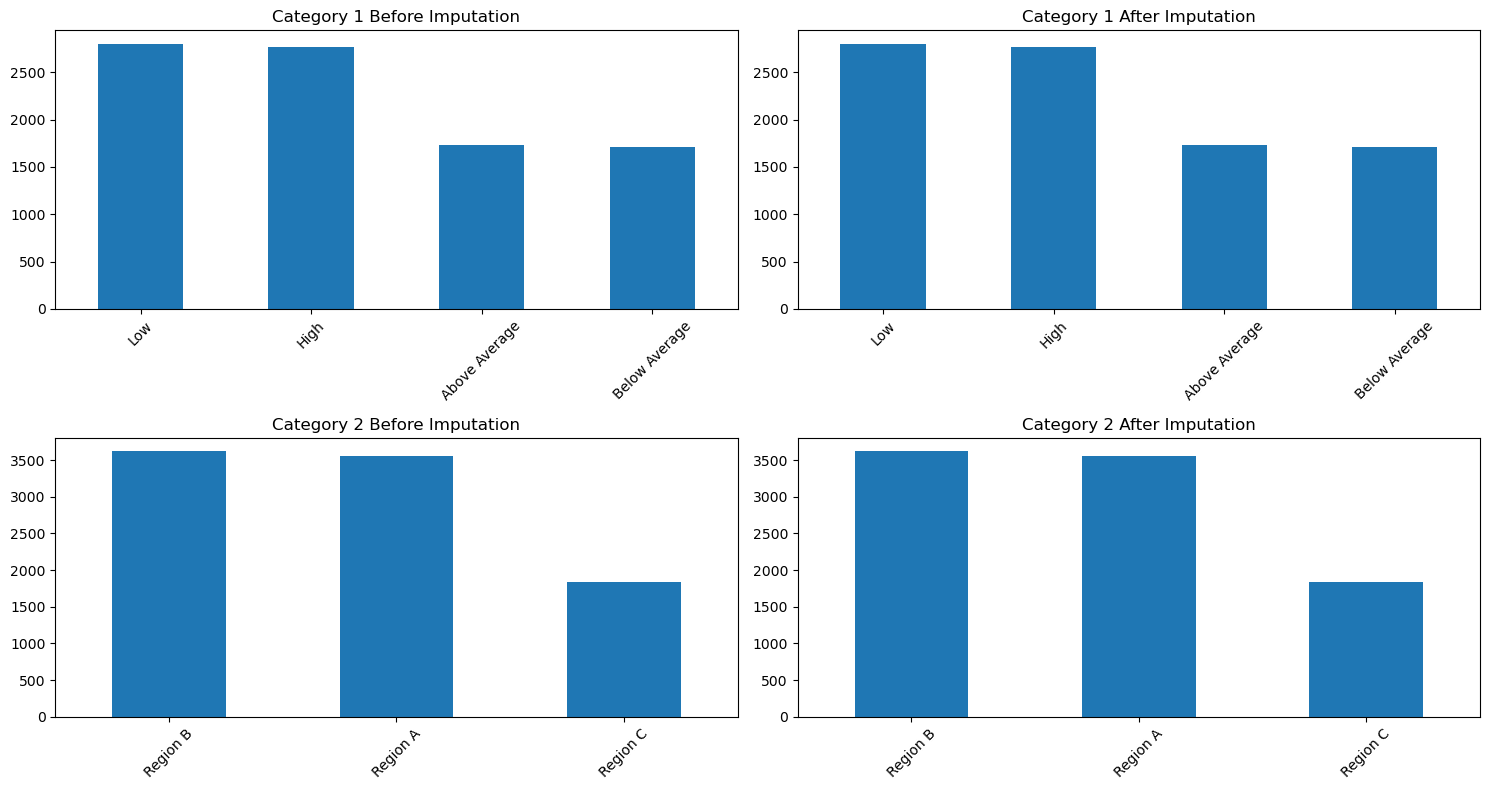

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)  
df['category_1'].value_counts(dropna=False).plot(kind='bar')
plt.title('Category 1 Before Imputation')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2) 
df_clean['category_1'].value_counts().plot(kind='bar')
plt.title('Category 1 After Imputation')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3) 
df['category_2'].value_counts(dropna=False).plot(kind='bar')
plt.title('Category 2 Before Imputation')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df_clean['category_2'].value_counts().plot(kind='bar')
plt.title('Category 2 After Imputation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### step 10: Verify No Missing Values Remain

In [11]:
print("\nVerifying no missing values remain:")
print("-" * 50)
print(df_clean.isnull().sum())


Verifying no missing values remain:
--------------------------------------------------
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64


### step 11: Save Progress

In [12]:
df_clean.to_csv('data_no_missing.csv', index=False)
print("\nDataset with handled missing values saved as 'data_no_missing.csv'")

print("\nFinal Dataset Info:")
print("-" * 50)
print(df_clean.info())


Dataset with handled missing values saved as 'data_no_missing.csv'

Final Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   9000 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   9000 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB
None


### step 11: Identify Outliers

In [13]:
for feature in ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']:
    print(f"\nAnalyzing {feature}")

    mean = df[feature].mean()
    std = df[feature].std()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    z_score_boundary = 3
    iqr_boundary = 1.5
    
    z_scores = np.abs((df[feature] - mean) / std)
    z_score_outliers = df[z_scores > z_score_boundary][feature]

    iqr_lower = Q1 - iqr_boundary * IQR
    iqr_upper = Q3 + iqr_boundary * IQR
    iqr_outliers = df[(df[feature] < iqr_lower) | (df[feature] > iqr_upper)][feature]

    print("\nZ-score method:")
    print(f"Number of outliers: {len(z_score_outliers)}")
    print(f"Percentage: {(len(z_score_outliers)/len(df))*100:.2f}%")
    print(f"Outlier boundaries: {mean - z_score_boundary*std:.2f} to {mean + z_score_boundary*std:.2f}")
    
    print("\nIQR method:")
    print(f"Number of outliers: {len(iqr_outliers)}")
    print(f"Percentage: {(len(iqr_outliers)/len(df))*100:.2f}%")
    print(f"Outlier boundaries: {iqr_lower:.2f} to {iqr_upper:.2f}")


Analyzing feature_1

Z-score method:
Number of outliers: 47
Percentage: 0.52%
Outlier boundaries: -3.72 to 3.72

IQR method:
Number of outliers: 113
Percentage: 1.26%
Outlier boundaries: -2.72 to 2.72

Analyzing feature_2

Z-score method:
Number of outliers: 47
Percentage: 0.52%
Outlier boundaries: -7.52 to 7.53

IQR method:
Number of outliers: 106
Percentage: 1.18%
Outlier boundaries: -5.53 to 5.52

Analyzing feature_3

Z-score method:
Number of outliers: 19
Percentage: 0.21%
Outlier boundaries: -4.63 to 4.63

IQR method:
Number of outliers: 75
Percentage: 0.83%
Outlier boundaries: -4.11 to 4.13

Analyzing feature_4

Z-score method:
Number of outliers: 27
Percentage: 0.30%
Outlier boundaries: -6.19 to 6.18

IQR method:
Number of outliers: 71
Percentage: 0.79%
Outlier boundaries: -5.59 to 5.59

Analyzing feature_5

Z-score method:
Number of outliers: 0
Percentage: 0.00%
Outlier boundaries: -1.73 to 1.73

IQR method:
Number of outliers: 0
Percentage: 0.00%
Outlier boundaries: -2.00 to 

### step 12: Visualize

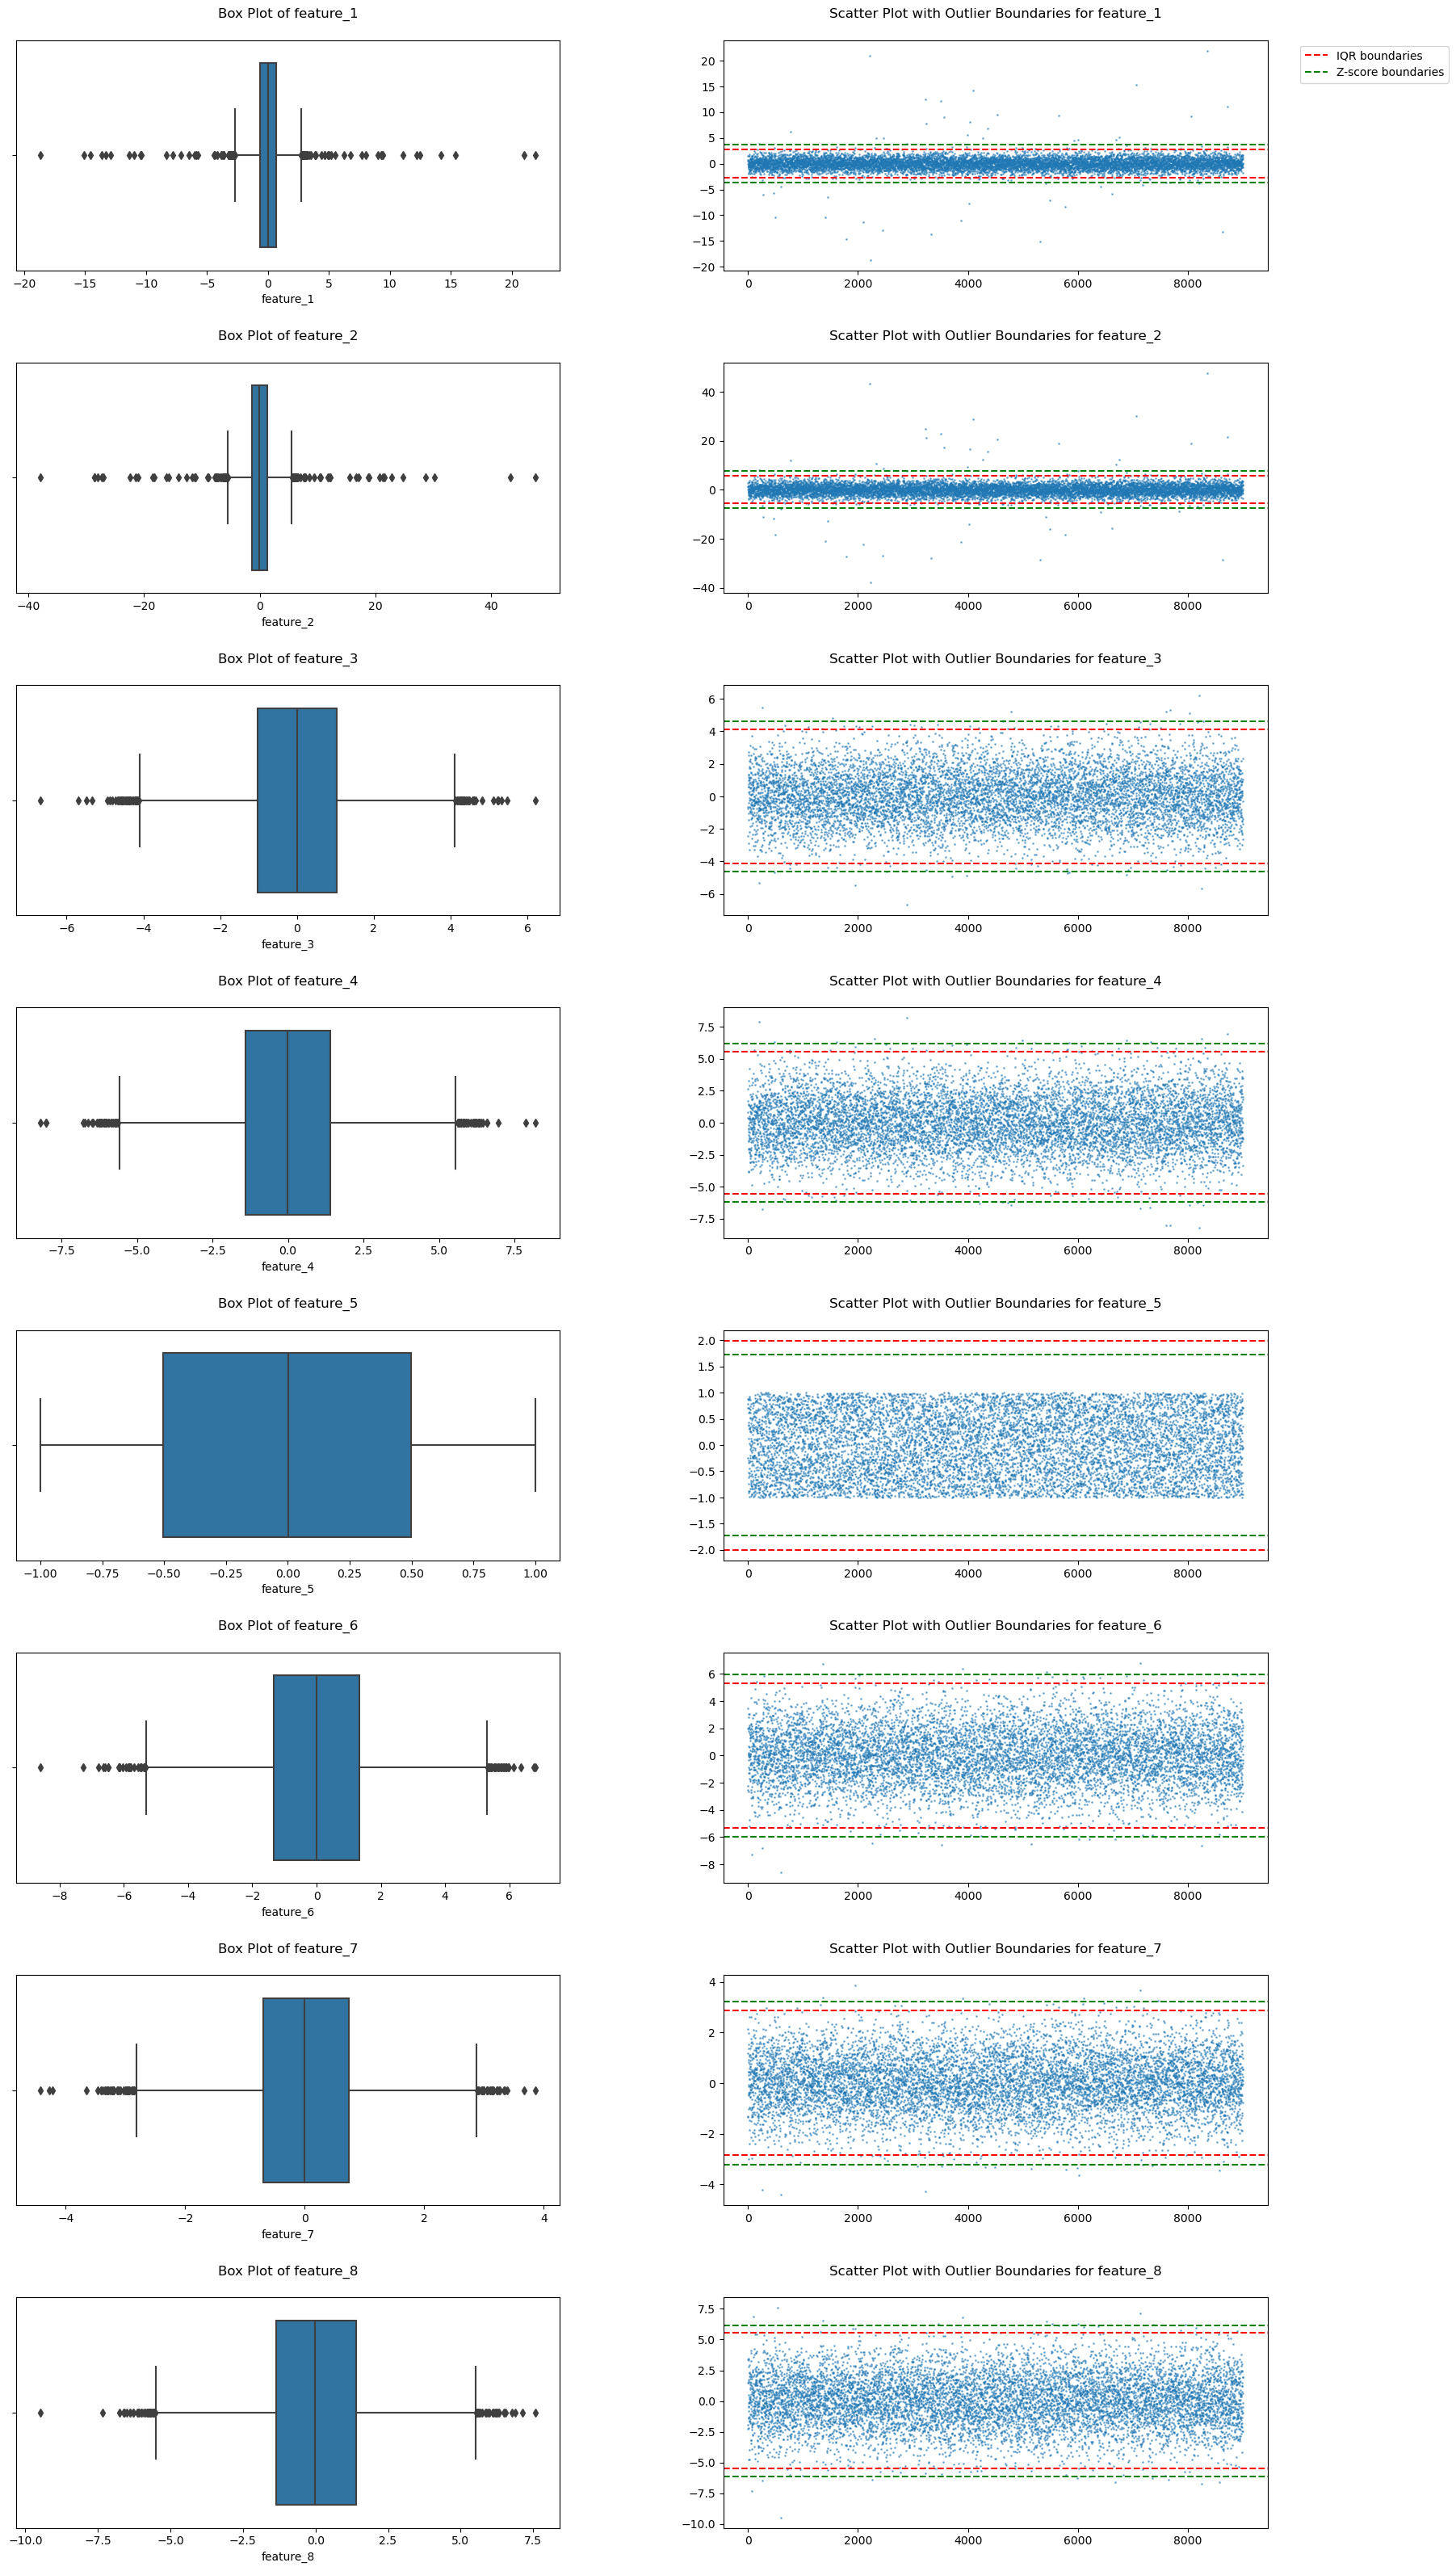

In [14]:
plt.figure(figsize=(20, 40))  # Made taller
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Added more space between plots

# For each numerical feature
for i, feature in enumerate(['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                           'feature_5', 'feature_6', 'feature_7', 'feature_8'], 1):
    mean = df[feature].mean()
    std = df[feature].std()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    z_score_boundary = 3
    iqr_boundary = 1.5

    iqr_lower = Q1 - iqr_boundary * IQR
    iqr_upper = Q3 + iqr_boundary * IQR

    plt.subplot(8, 2, 2*i-1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}', pad=20)
    
    plt.subplot(8, 2, 2*i)
    plt.scatter(range(len(df)), df[feature], alpha=0.5, s=1)
    plt.axhline(y=iqr_upper, color='r', linestyle='--', label='IQR boundaries')
    plt.axhline(y=iqr_lower, color='r', linestyle='--')
    plt.axhline(y=mean + z_score_boundary*std, color='g', linestyle='--', label='Z-score boundaries')
    plt.axhline(y=mean - z_score_boundary*std, color='g', linestyle='--')
    plt.title(f'Scatter Plot with Outlier Boundaries for {feature}', pad=20) 

    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

### step 13: Treatment using clipping

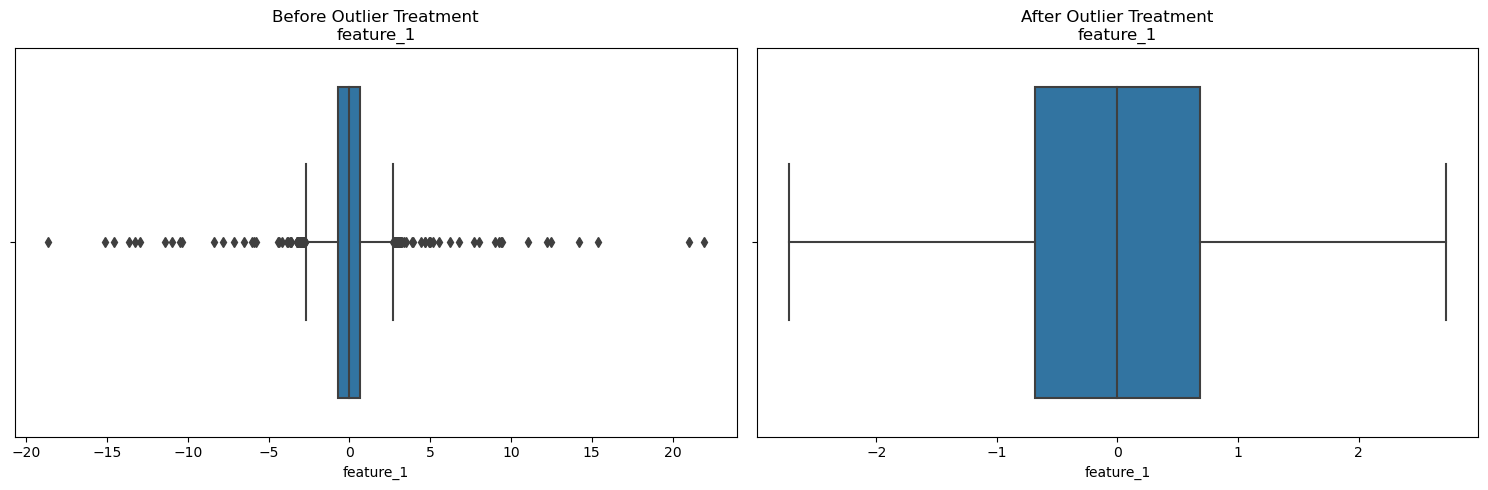


Feature: feature_1
Number of outliers treated: 113
Percentage of data points modified: 1.26%

Before treatment:
count    9000.000000
mean        0.000427
std         1.241318
min       -18.665400
25%        -0.680062
50%        -0.003938
75%         0.680513
max        21.934496
Name: feature_1, dtype: float64

After treatment:
count    9000.000000
mean       -0.000922
std         1.018637
min        -2.720924
25%        -0.680062
50%        -0.003938
75%         0.680513
max         2.721374
Name: feature_1, dtype: float64
--------------------------------------------------


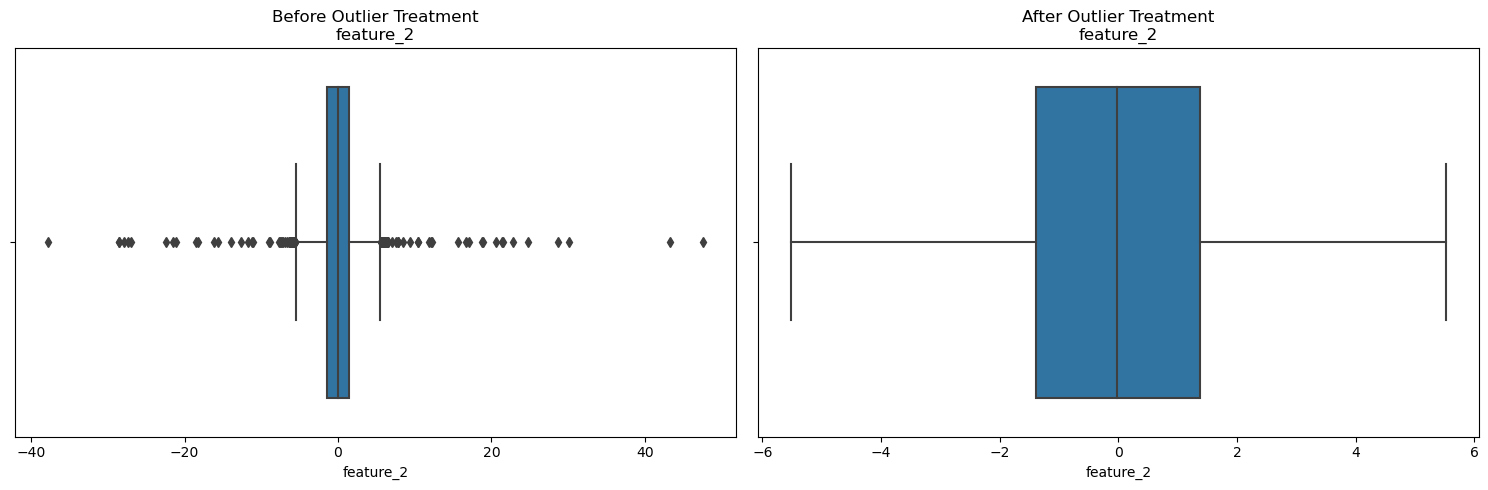


Feature: feature_2
Number of outliers treated: 106
Percentage of data points modified: 1.18%

Before treatment:
count    9000.000000
mean        0.003349
std         2.508324
min       -37.852816
25%        -1.382610
50%        -0.016698
75%         1.380228
max        47.603454
Name: feature_2, dtype: float64

After treatment:
count    9000.000000
mean        0.000080
std         2.049281
min        -5.526868
25%        -1.382610
50%        -0.016698
75%         1.380228
max         5.524486
Name: feature_2, dtype: float64
--------------------------------------------------


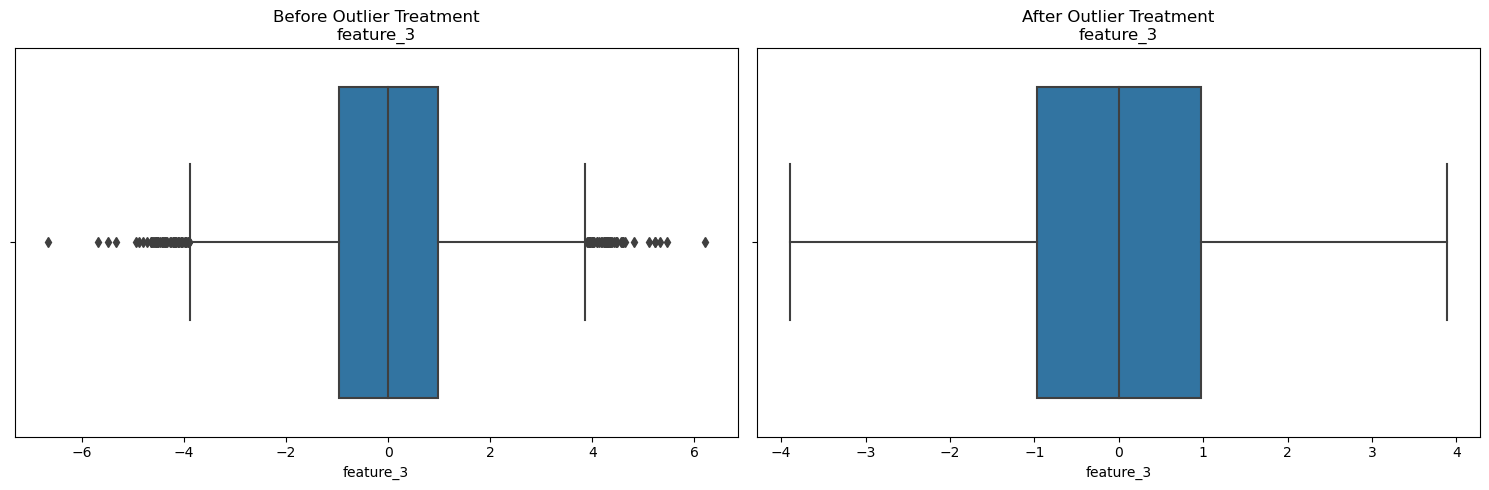


Feature: feature_3
Number of outliers treated: 107
Percentage of data points modified: 1.19%

Before treatment:
count    9000.000000
mean        0.003235
std         1.508221
min        -6.676680
25%        -0.973333
50%         0.003235
75%         0.972588
max         6.203055
Name: feature_3, dtype: float64

After treatment:
count    9000.000000
mean        0.003673
std         1.490907
min        -3.892214
25%        -0.973333
50%         0.003235
75%         0.972588
max         3.891469
Name: feature_3, dtype: float64
--------------------------------------------------


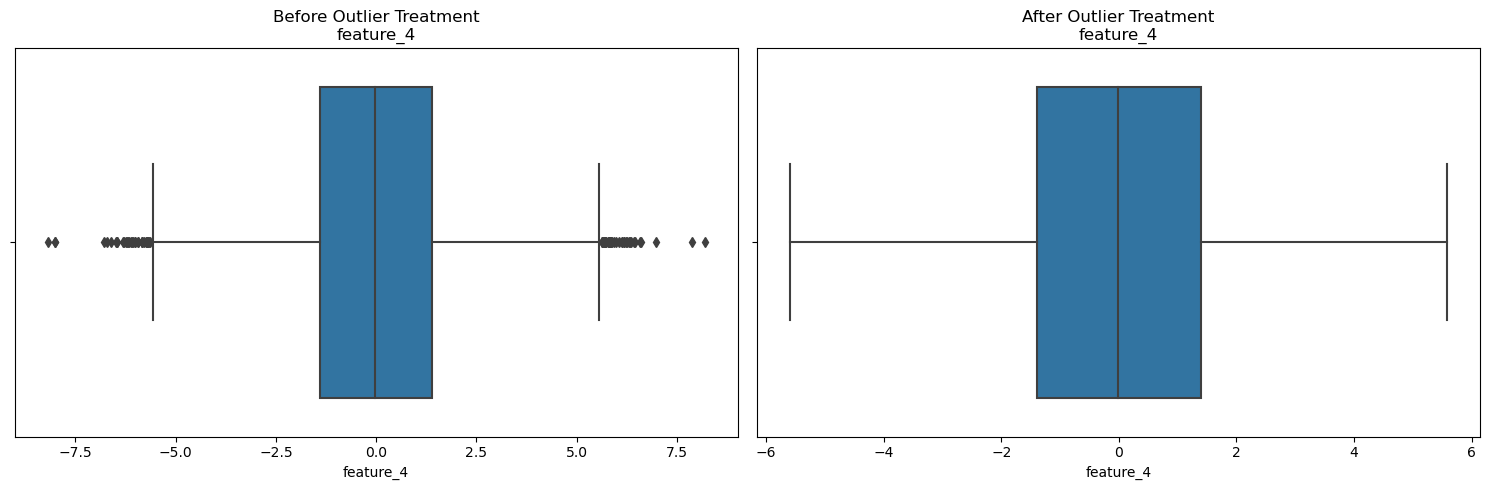


Feature: feature_4
Number of outliers treated: 71
Percentage of data points modified: 0.79%

Before treatment:
count    9000.000000
mean       -0.008481
std         2.061784
min        -8.190124
25%        -1.399928
50%        -0.019541
75%         1.394151
max         8.189001
Name: feature_4, dtype: float64

After treatment:
count    9000.000000
mean       -0.008231
std         2.047744
min        -5.591048
25%        -1.399928
50%        -0.019541
75%         1.394151
max         5.585270
Name: feature_4, dtype: float64
--------------------------------------------------


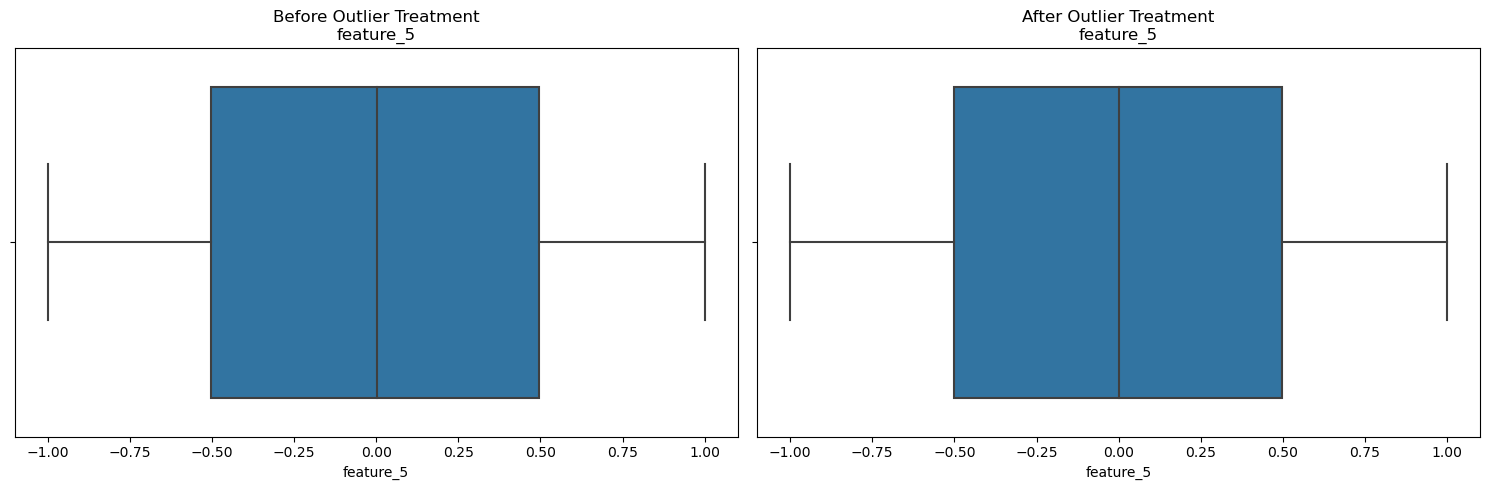


Feature: feature_5
Number of outliers treated: 0
Percentage of data points modified: 0.00%

Before treatment:
count    9000.000000
mean       -0.002177
std         0.577415
min        -0.999791
25%        -0.502614
50%         0.001695
75%         0.497004
max         0.999914
Name: feature_5, dtype: float64

After treatment:
count    9000.000000
mean       -0.002177
std         0.577415
min        -0.999791
25%        -0.502614
50%         0.001695
75%         0.497004
max         0.999914
Name: feature_5, dtype: float64
--------------------------------------------------


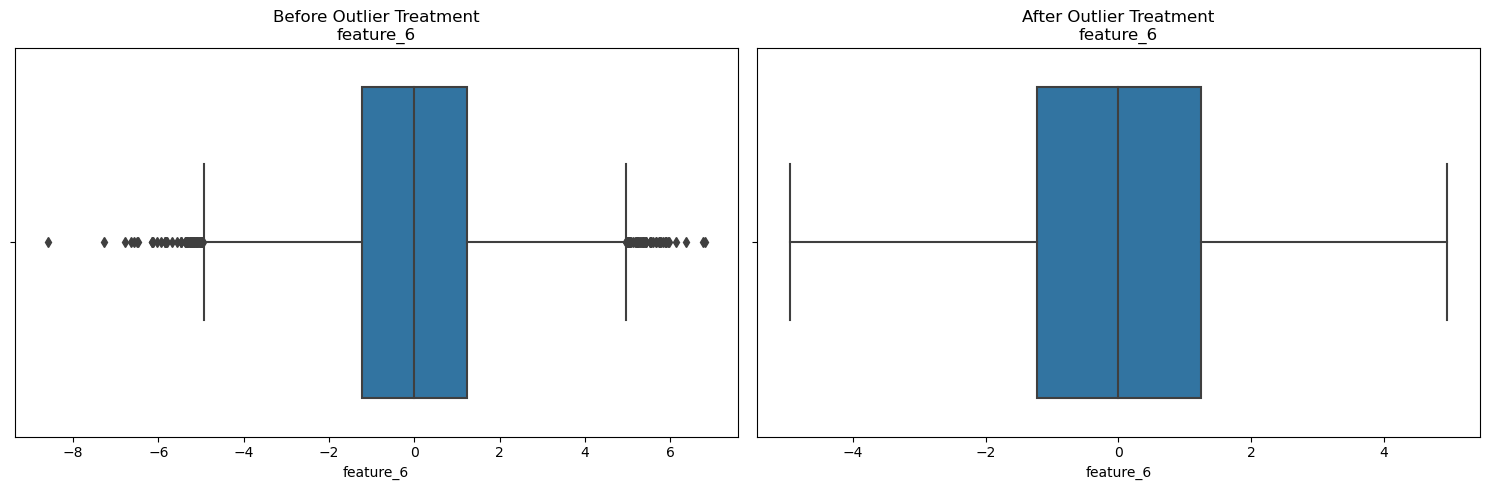


Feature: feature_6
Number of outliers treated: 119
Percentage of data points modified: 1.32%

Before treatment:
count    9000.000000
mean       -0.006447
std         1.925777
min        -8.590782
25%        -1.233948
50%        -0.006447
75%         1.241916
max         6.803751
Name: feature_6, dtype: float64

After treatment:
count    9000.000000
mean       -0.005221
std         1.905483
min        -4.947744
25%        -1.233948
50%        -0.006447
75%         1.241916
max         4.955712
Name: feature_6, dtype: float64
--------------------------------------------------


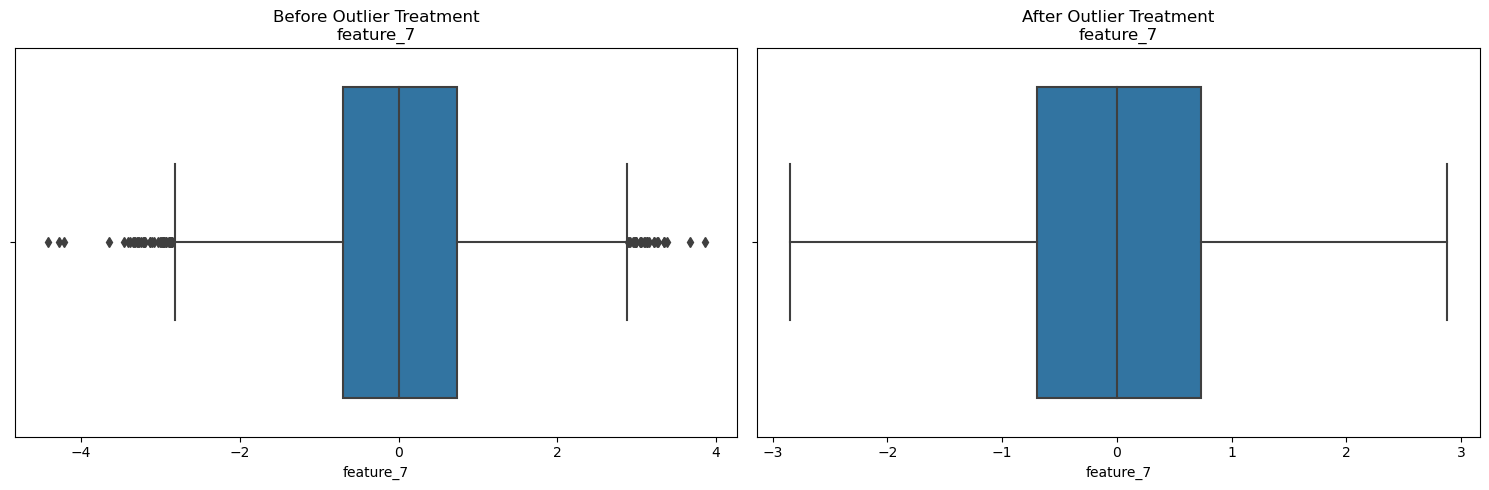


Feature: feature_7
Number of outliers treated: 69
Percentage of data points modified: 0.77%

Before treatment:
count    9000.000000
mean        0.000592
std         1.075064
min        -4.422265
25%        -0.700078
50%        -0.000097
75%         0.731942
max         3.857219
Name: feature_7, dtype: float64

After treatment:
count    9000.000000
mean        0.001360
std         1.067988
min        -2.848108
25%        -0.700078
50%        -0.000097
75%         0.731942
max         2.879971
Name: feature_7, dtype: float64
--------------------------------------------------


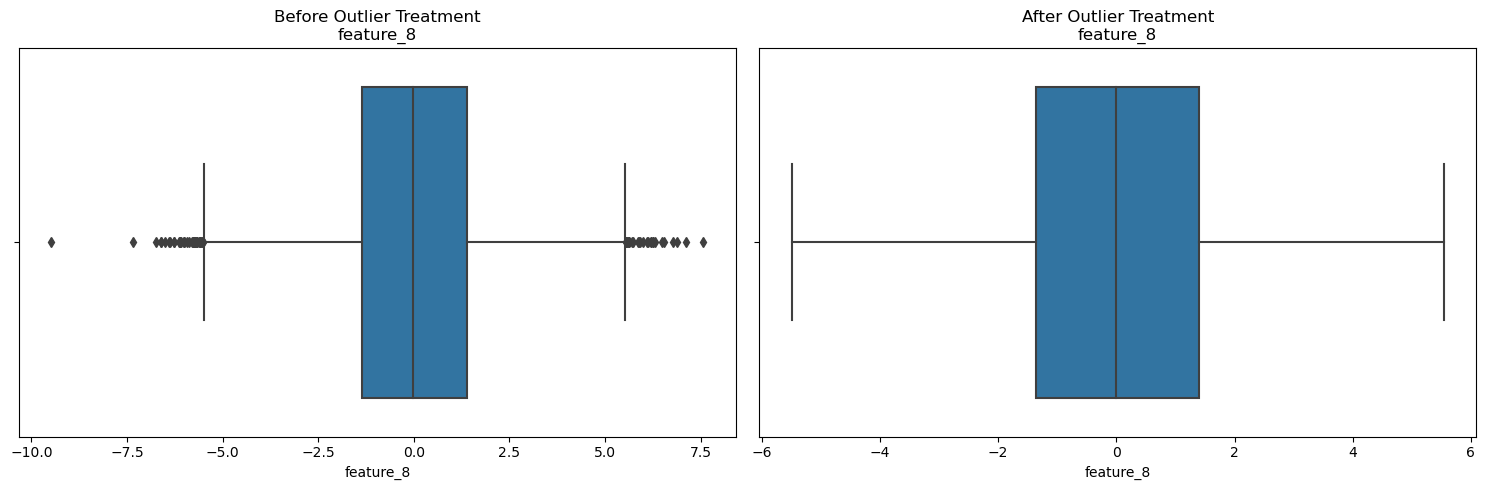


Feature: feature_8
Number of outliers treated: 61
Percentage of data points modified: 0.68%

Before treatment:
count    9000.000000
mean        0.003348
std         2.043643
min        -9.474989
25%        -1.356620
50%        -0.007584
75%         1.402024
max         7.572578
Name: feature_8, dtype: float64

After treatment:
count    9000.000000
mean        0.004040
std         2.031481
min        -5.494586
25%        -1.356620
50%        -0.007584
75%         1.402024
max         5.539990
Name: feature_8, dtype: float64
--------------------------------------------------

Cleaned dataset saved as 'cleaned_dataset.csv'


In [15]:
for feature in df_clean.columns[df_clean.columns.str.startswith('feature')]:
    # Calculate statistics
    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_values = df_clean[feature].copy()

    df_clean[feature] = df_clean[feature].clip(lower=lower_bound, upper=upper_bound)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=original_values)
    plt.title(f'Before Outlier Treatment\n{feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[feature])
    plt.title(f'After Outlier Treatment\n{feature}')
    
    plt.tight_layout()
    plt.show()

    print(f"\nFeature: {feature}")
    print(f"Number of outliers treated: {sum(original_values != df_clean[feature])}")
    print(f"Percentage of data points modified: {(sum(original_values != df_clean[feature])/len(df_clean))*100:.2f}%")
    print("\nBefore treatment:")
    print(original_values.describe())
    print("\nAfter treatment:")
    print(df_clean[feature].describe())
    print("-" * 50)

df_clean.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")

### step 14: Encode Categorical Variables

Category 1 Encoding Mapping:
Above Average -> 0
Below Average -> 1
High -> 2
Low -> 3


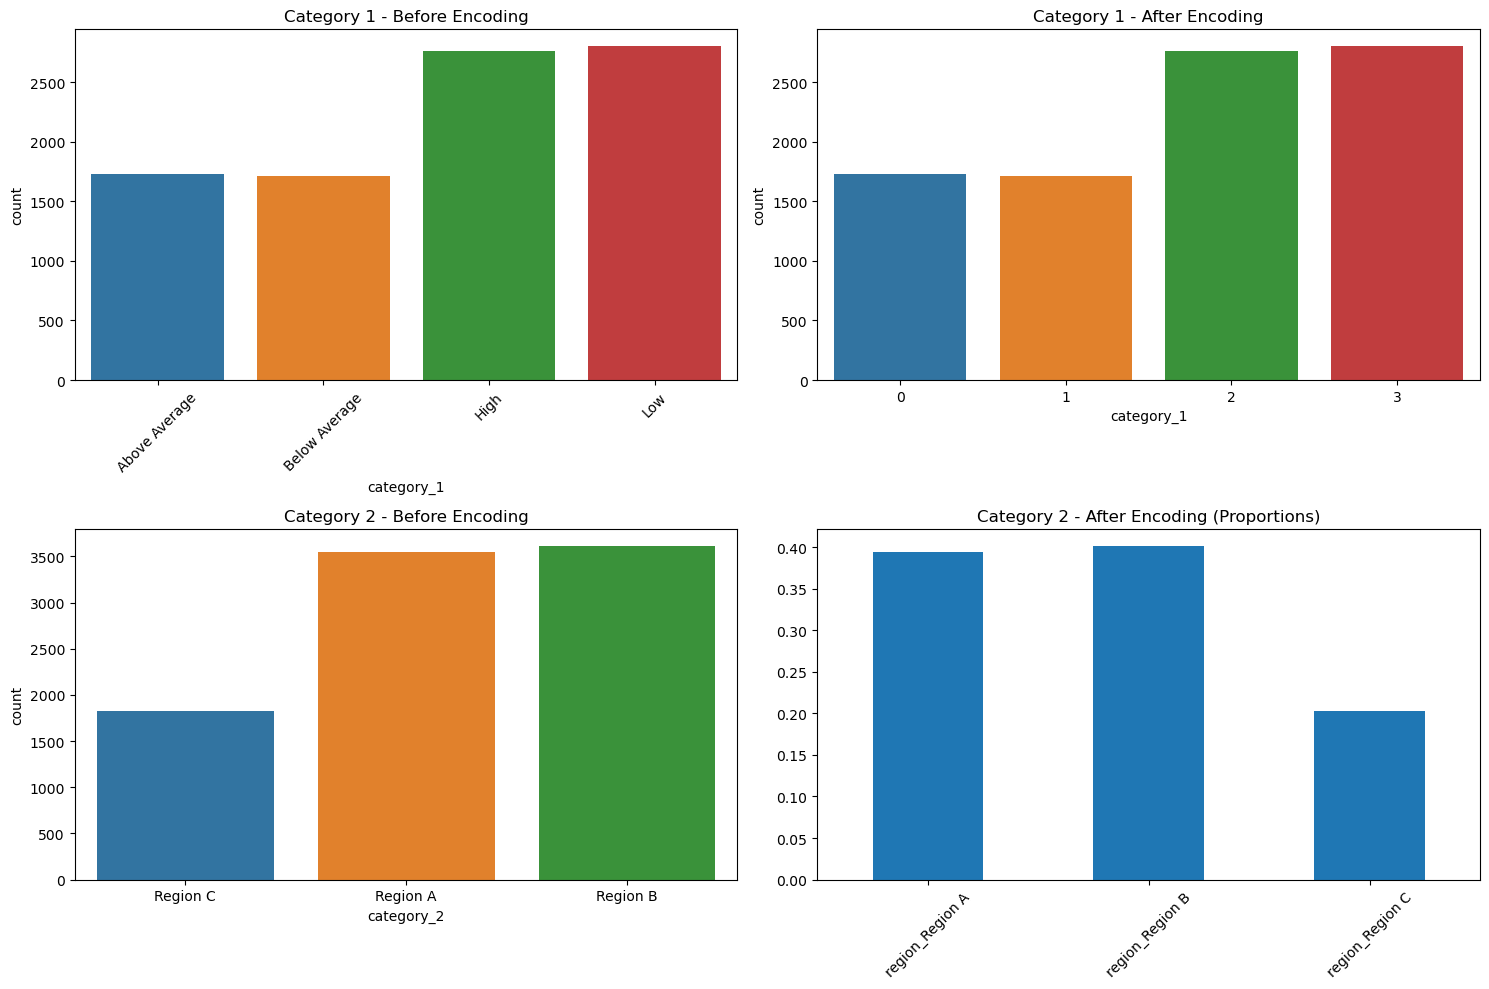


Shape of dataset before one-hot encoding: 13
Shape of dataset after one-hot encoding: 13

New columns created: ['region_Region A', 'region_Region B', 'region_Region C']

Category 1 (Label Encoded) statistics:
count    9000.000000
mean        1.737778
std         1.095463
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: category_1, dtype: float64

Category 2 (One-Hot Encoded) statistics:

region_Region A:
0    0.605444
1    0.394556
Name: region_Region A, dtype: float64

region_Region B:
0    0.598
1    0.402
Name: region_Region B, dtype: float64

region_Region C:
0    0.796556
1    0.203444
Name: region_Region C, dtype: float64

Encoding mappings saved: {'category_1': {'Above Average': 0, 'Below Average': 1, 'High': 2, 'Low': 3}, 'category_2': 'one-hot encoded into columns: region_Region A, region_Region B, region_Region C'}


In [16]:
cat1_original = df_clean['category_1'].copy()
cat2_original = df_clean['category_2'].copy()

le = LabelEncoder()
custom_order = ['Low', 'Below Average', 'Above Average', 'High']
le.fit(custom_order)
df_clean['category_1'] = le.transform(df_clean['category_1'])

print("Category 1 Encoding Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

df_clean = pd.get_dummies(df_clean, columns=['category_2'], prefix='region')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x=cat1_original, ax=axes[0,0])
axes[0,0].set_title('Category 1 - Before Encoding')
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(x=df_clean['category_1'], ax=axes[0,1])
axes[0,1].set_title('Category 1 - After Encoding')

sns.countplot(x=cat2_original, ax=axes[1,0])
axes[1,0].set_title('Category 2 - Before Encoding')

region_cols = [col for col in df_clean.columns if col.startswith('region_')]
region_means = df_clean[region_cols].mean()
region_means.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Category 2 - After Encoding (Proportions)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nShape of dataset before one-hot encoding:", len(df_clean.columns))
print("Shape of dataset after one-hot encoding:", len(df_clean.columns))
print("\nNew columns created:", region_cols)

print("\nCategory 1 (Label Encoded) statistics:")
print(df_clean['category_1'].describe())

print("\nCategory 2 (One-Hot Encoded) statistics:")
for col in region_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts(normalize=True))

encoding_map = {
    'category_1': dict(zip(le.classes_, range(len(le.classes_)))),
    'category_2': 'one-hot encoded into columns: ' + ', '.join(region_cols)
}

print("\nEncoding mappings saved:", encoding_map)

### step 15: Scaling 

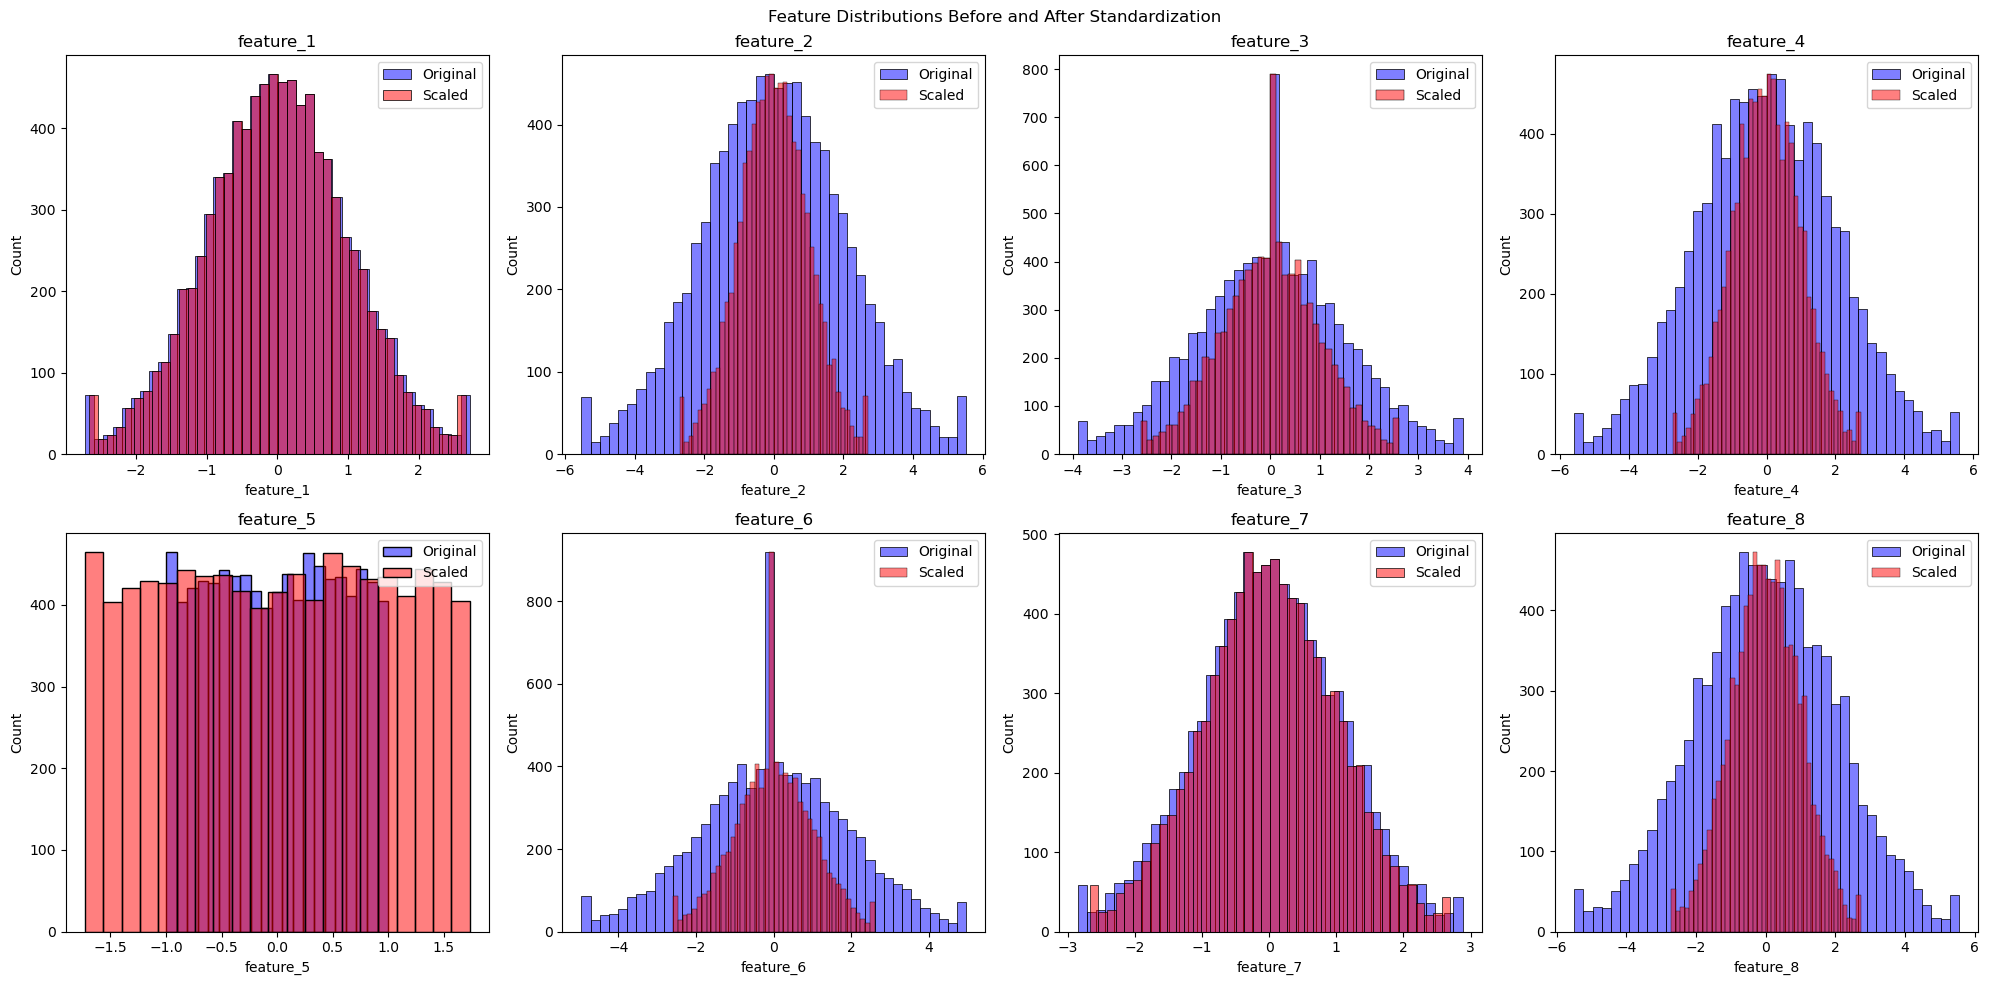


Summary Statistics After Scaling:
          feature_1     feature_2     feature_3     feature_4     feature_5  \
count  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03  9.000000e+03   
mean   2.723747e-17 -3.157968e-18  5.526444e-18  1.500035e-17  2.013204e-17   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -2.670385e+00 -2.697168e+00 -2.613244e+00 -2.726477e+00 -1.727818e+00   
25%   -6.667518e-01 -6.747574e-01 -6.553462e-01 -6.796623e-01 -8.667329e-01   
50%   -2.961869e-03 -8.188071e-03 -2.932976e-04 -5.523090e-03  6.705788e-03   
75%    6.690037e-01  6.735166e-01  6.499193e-01  6.848809e-01  8.645580e-01   
max    2.672637e+00  2.695928e+00  2.607817e+00  2.731696e+00  1.735573e+00   

          feature_6     feature_7     feature_8  
count  9.000000e+03  9.000000e+03  9.000000e+03  
mean   1.401348e-17  1.164501e-17  1.815831e-17  
std    1.000056e+00  1.000056e+00  1.000056e+00  
min   -2.593987e+00 -2.668219e+00 -2.706858e+00  
25%

In [17]:

numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                     'feature_5', 'feature_6', 'feature_7', 'feature_8']
original_data = df_clean[numerical_features].copy()

scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Feature Distributions Before and After Standardization')

for idx, feature in enumerate(numerical_features):
    row = idx // 4
    col = idx % 4

    sns.histplot(original_data[feature], ax=axes[row,col], color='blue', alpha=0.5, label='Original')

    sns.histplot(df_clean[feature], ax=axes[row,col], color='red', alpha=0.5, label='Scaled')
    
    axes[row,col].set_title(feature)
    axes[row,col].legend()

plt.tight_layout()
plt.show()

print("\nSummary Statistics After Scaling:")
print(df_clean[numerical_features].describe())

scaling_params = pd.DataFrame({
    'mean': scaler.mean_,
    'scale': scaler.scale_,
}, index=numerical_features)

print("\nScaling Parameters:")
print(scaling_params)

### step 16: Save final preprocessed dataset

In [18]:
df_clean.to_csv('cleaned_dataset.csv', index=False)
print("Final preprocessed dataset saved with all transformations applied")

Final preprocessed dataset saved with all transformations applied


### step 17: Create Correlation Heatmap 

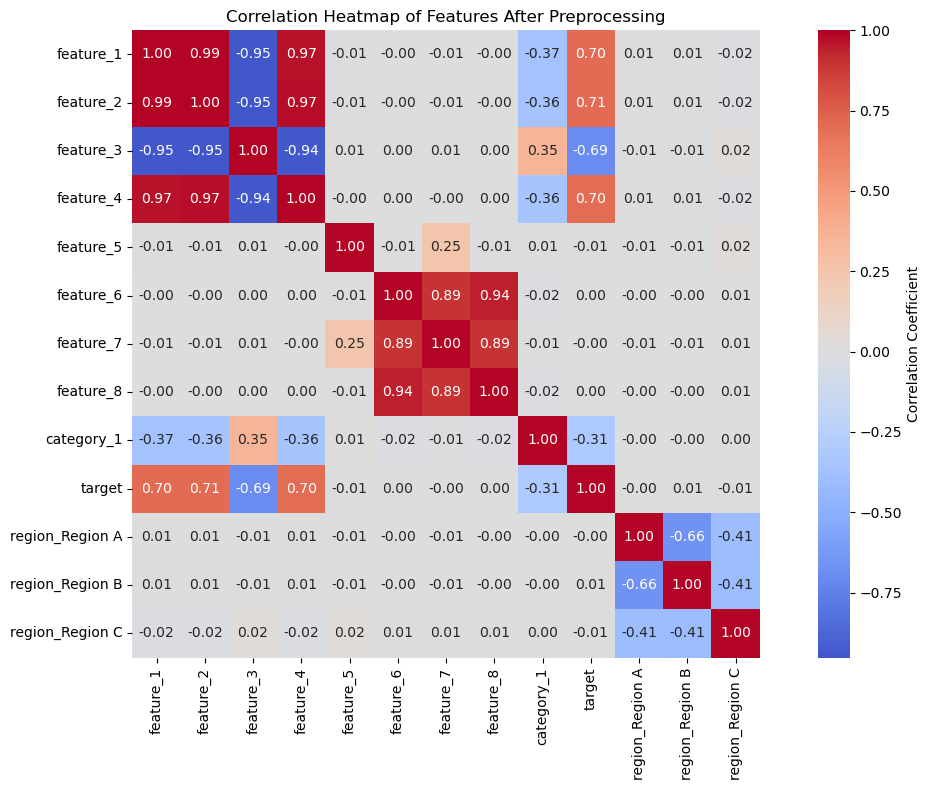


Strong correlations (|correlation| > 0.5):
feature_1 vs feature_2: 0.995
feature_1 vs feature_3: -0.952
feature_1 vs feature_4: 0.966
feature_1 vs target: 0.704
feature_2 vs feature_3: -0.946
feature_2 vs feature_4: 0.970
feature_2 vs target: 0.707
feature_3 vs feature_4: -0.937
feature_3 vs target: -0.693
feature_4 vs target: 0.698
feature_6 vs feature_7: 0.895
feature_6 vs feature_8: 0.939
feature_7 vs feature_8: 0.894
region_Region A vs region_Region B: -0.662


In [19]:
correlation_matrix = df_clean.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',          # Round to 2 decimal places
            square=True,         # Make the plot square-shaped
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Features After Preprocessing')
plt.tight_layout()
plt.show()

print("\nStrong correlations (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.5:
            print(f"{correlation_matrix.index[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i,j]:.3f}")